In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [2]:
data = pd.read_csv("Mall_Customers.csv")
print(data.head())
print(data.info())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [6]:
le = LabelEncoder()
data['Genre'] = le.fit_transform(data['Genre'])
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

C:\Users\Ajinkya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


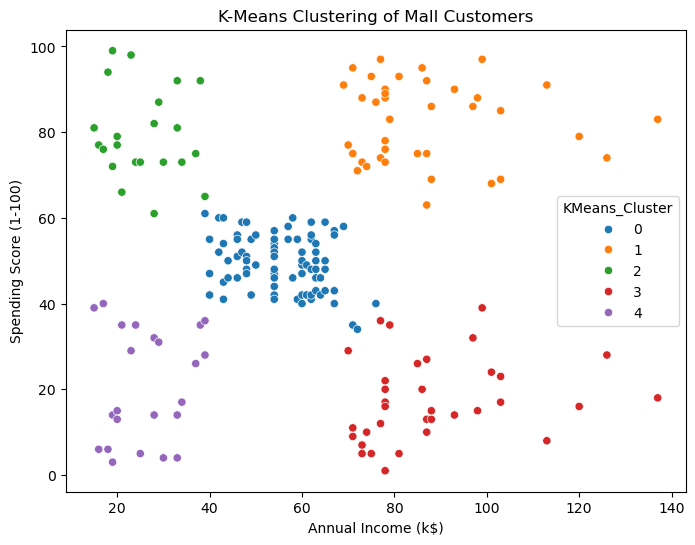

In [7]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)
data['KMeans_Cluster'] = y_kmeans
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=data['Annual Income (k$)'],
    y=data['Spending Score (1-100)'],
    hue=data['KMeans_Cluster'],
    palette='tab10'
)
plt.title('K-Means Clustering of Mall Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

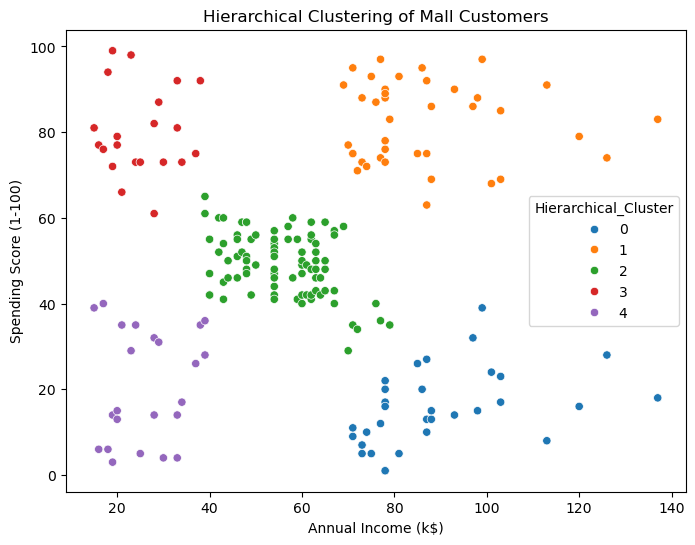

In [8]:
hc = AgglomerativeClustering(n_clusters=5, linkage='ward')
y_hc = hc.fit_predict(X_scaled)
data['Hierarchical_Cluster'] = y_hc
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=data['Annual Income (k$)'],
    y=data['Spending Score (1-100)'],
    hue=data['Hierarchical_Cluster'],
    palette='tab10'
)
plt.title('Hierarchical Clustering of Mall Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

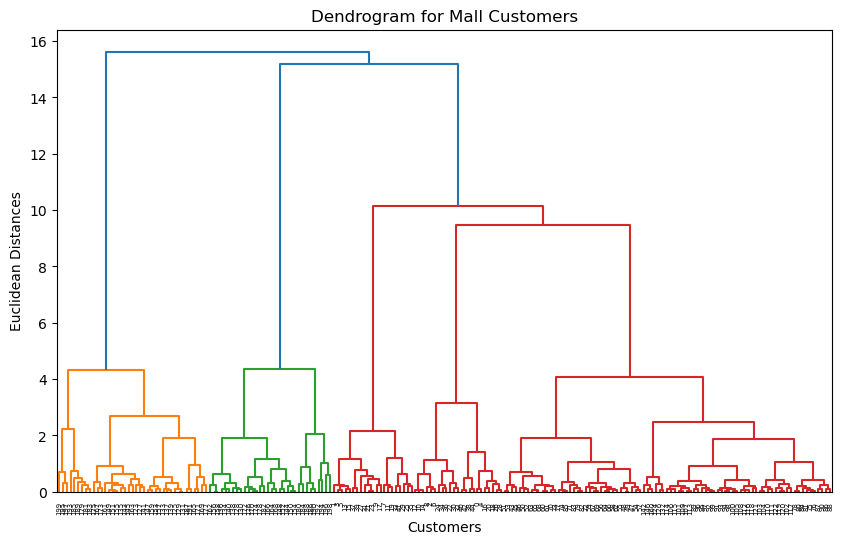

In [10]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title('Dendrogram for Mall Customers')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show()

In [11]:
print("K-Means Cluster Counts:\n", data['KMeans_Cluster'].value_counts())
print("\nHierarchical Cluster Counts:\n", data['Hierarchical_Cluster'].value_counts())
print("\nK-Means Cluster Centers (scaled):\n", kmeans.cluster_centers_)

K-Means Cluster Counts:
 KMeans_Cluster
0    81
1    39
3    35
4    23
2    22
Name: count, dtype: int64

Hierarchical Cluster Counts:
 Hierarchical_Cluster
2    85
1    39
0    32
4    23
3    21
Name: count, dtype: int64

K-Means Cluster Centers (scaled):
 [[-0.20091257 -0.02645617]
 [ 0.99158305  1.23950275]
 [-1.32954532  1.13217788]
 [ 1.05500302 -1.28443907]
 [-1.30751869 -1.13696536]]
